<a href="https://colab.research.google.com/github/SantiagoFra/Twitch-Analytics/blob/main/twitch_analysis_spanish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISIS DE DATOS
Este análisis se hizo con el fin de entender mejor las características y el rendimiento de los canales de Twitch, especialmente en aquellos que transmiten en español. El dataset utilizado es el siguiente: https://www.kaggle.com/datasets/aayushmishra1512/twitchdata

Es un dataset que contiene los datos del top 1000 streamers de Twitch con distintas características.

Este análisis fue hecho por: Fragola Santiago



# PREGUNTAS
Este análisis intentará responder a las siguientes preguntas:
1. ¿Cuál es la distribución de lenguajes en los canales? <br>
2. ¿Cuál es la distribución de contenido maduro (Mature) en los canales en español? <br>
3. ¿Cuál es la distribución de canales asociados con el programa Partner de Twitch? <br>
4. ¿Existe alguna correlación entre las variables numéricas?
5. ¿Cuáles son los canales en español con el máximo pico de vistas? <br>
6. ¿Cuáles son los canales en español con más seguidores?

In [25]:
# Importo las librerías que se utilizarán

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('twitch.csv')

In [27]:
# Obtengo información básica del dataset

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB
None
       Watch time(Minutes)  Stream time(minutes)   Peak viewers  \
count         1.000000e+03           1000.000000    1000.000000   
mean          4.184279e+08         120515.160

Lo que voy a hacer es revisar gracias a los gráficos de bigotes, a todos los valores de los campos para encontrar "outliers" (valores atípicos). <br>
Es importante deshacerse de este tipo de dato, porque estos nos pueden generar conclusiones engañosas al finalizar un análisis.

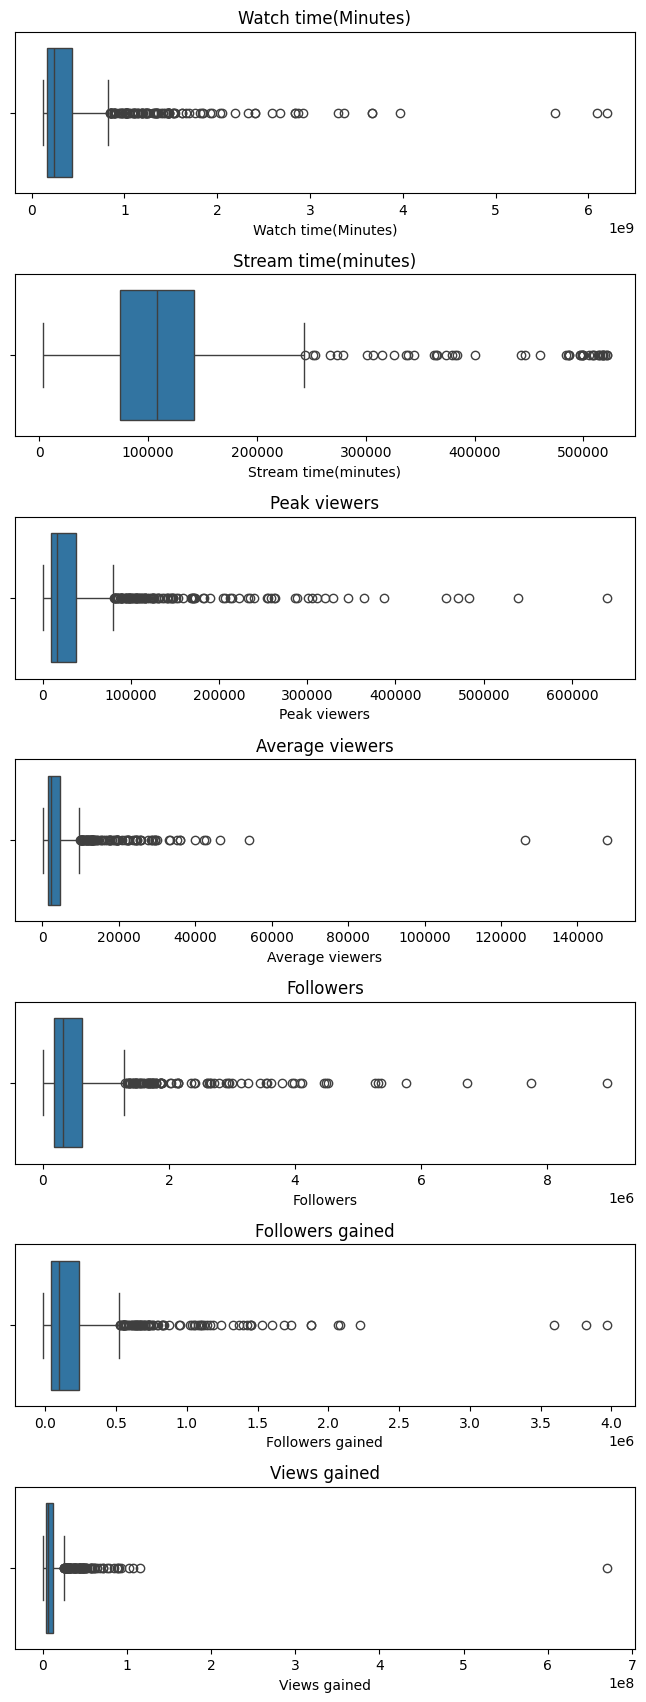

In [28]:
#Selecciono a todas las columnas númericas
cols_num = df.select_dtypes(include='int64').columns

#Realizo los gráficos de bigotes para cada una de ellas
fig, axes = plt.subplots(nrows=len(cols_num), figsize=(8, len(cols_num)*3))
fig.subplots_adjust(hspace=0.5)

for col, ax in zip(cols_num, axes):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)

Followers gained, Views Gained, Average viewers y Watch time(minutes) presentan valores atípicos que se van muy lejos de la media. Por lo tanto lo tendré en cuenta a la hora de realizar la limpieza correspondiente.

También voy a revisar a las variables de tipo objeto y booleanos para verificar que todos sus valores sean correctos.

In [29]:
cols_cat = ['Partnered','Mature','Language']
for i, col in enumerate(cols_cat):
  print(df[col].unique())

[ True False]
[False  True]
['English' 'Portuguese' 'Spanish' 'German' 'Korean' 'French' 'Russian'
 'Japanese' 'Chinese' 'Czech' 'Turkish' 'Italian' 'Polish' 'Thai' 'Arabic'
 'Slovak' 'Other' 'Hungarian' 'Greek' 'Finnish' 'Swedish']


Al no encontrar valores fuera de lo normal en las columnas de cols_cat, procedo a eliminar a los outliers de las variables númericas.

In [30]:
print(f'Numero de filas antes de la limpieza: {df.shape[0]}')
df = df[df['Followers gained'] >= 0]
print(f'Numero de filas después de la limpieza: {df.shape[0]}')

Numero de filas antes de la limpieza: 1000
Numero de filas después de la limpieza: 997


In [31]:
print(f'Numero de filas antes de la limpieza: {df.shape[0]}')
df = df[df['Views gained'] < 600000000]
print(f'Numero de filas después de la limpieza: {df.shape[0]}')

Numero de filas antes de la limpieza: 997
Numero de filas después de la limpieza: 996


In [32]:
print(f'Numero de filas antes de la limpieza: {df.shape[0]}')
df = df[df['Average viewers'] < 100000]
print(f'Numero de filas después de la limpieza: {df.shape[0]}')

Numero de filas antes de la limpieza: 996
Numero de filas después de la limpieza: 994


In [33]:
print(f'Numero de filas antes de la limpieza: {df.shape[0]}')
df = df[df['Watch time(Minutes)'] < 5000000000]
print(f'Numero de filas después de la limpieza: {df.shape[0]}')

Numero de filas antes de la limpieza: 994
Numero de filas después de la limpieza: 991


Una vez terminada la limpieza de datos, procedo a hacer un análisis que responda a las preguntas realizadas al comienzo.

¿Cuál es la distribución de lenguajes en los canales?

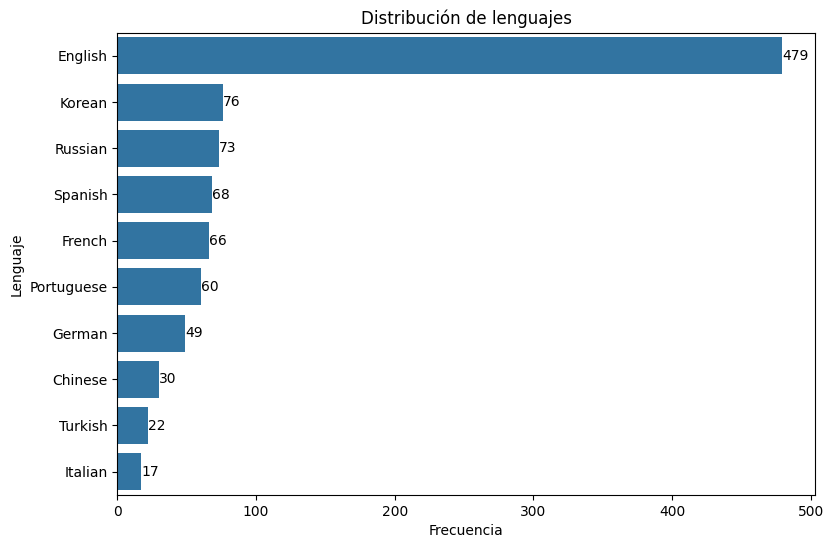

In [34]:
language_count = df['Language'].value_counts().nlargest(10) #Guardo en una variable los 10 lenguajes más hablados

# Creo el gráfico de barras
plt.figure(figsize=(9, 6))
ax = sns.barplot(x=language_count.values, y=language_count.index)
for i, value in enumerate(language_count.values):
    ax.text(value + 0.1, i, str(value), va='center')
plt.title('Distribución de lenguajes')
plt.xlabel('Frecuencia')
plt.ylabel('Lenguaje')
plt.show()

Ahora que conozco la distribución de lenguajes, procedo a realizar un filtro con aquellos canales que tengan como lenguaje Spanish (Español) ya que este análisis se centra en estos streamers.

In [35]:
#Me quedo solo con los canales en español
df_spanish = df[df['Language'] == 'Spanish']
print(df_spanish.shape)

(68, 11)


In [36]:
# Las primeras 5 filas de este dataset
df_spanish.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
13,Rubius,2588632635,58275,240096,42948,5751354,3820532,58599449,True,False,Spanish
14,auronplay,2410022550,40575,170115,53986,3983847,3966525,41514854,True,False,Spanish
25,TheGrefg,1757406750,54855,538444,28887,3795667,3593081,47094362,True,False,Spanish
43,ibai,1412913285,57795,173238,22837,1894953,1602088,44178173,True,False,Spanish
69,LVPes,1115650275,90960,233009,12947,587677,158934,51523747,True,False,Spanish


¿Cuál es la distribución de contenido maduro (Mature) en los canales en español?

Mature
False    57
True     11
Name: count, dtype: int64


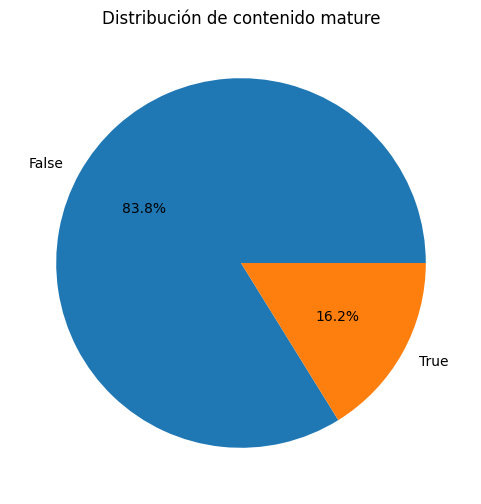

In [37]:
# Guardo en una variable la cantidad de canales según su contenido
mature_counts = df_spanish['Mature'].value_counts()
print(mature_counts)

# Realizo un gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(mature_counts, labels=mature_counts.index, autopct='%1.1f%%')
plt.title('Distribución de contenido mature')
plt.show()

In [38]:
# Muestro a los canales con un contenido maduro
df_spanish[df_spanish['Mature'] == True]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
171,Reborn_Live,578122875,32100,57849,17488,697007,682512,9965787,True,True,Spanish
568,ElcanaldeJoaco,208060515,20445,48072,8673,810622,758797,4893535,True,True,Spanish
606,Peereira7,198252765,133800,14532,1377,377689,361206,6222094,True,True,Spanish
623,zEkO,193867860,44970,21313,4440,743040,370683,5338943,True,True,Spanish
624,x6FlipiN,193573740,61095,19304,2712,279204,186655,6462906,True,True,Spanish
711,Pimpeano,170116395,21420,38592,6469,740343,665323,3744461,True,True,Spanish
752,goncho,162817050,61770,18091,2431,442412,236558,6156791,True,True,Spanish
810,natalan,152469705,60510,9561,2240,529357,462674,2737155,True,True,Spanish
821,Frankkaster,150181140,30975,49127,4886,826222,356711,5878239,True,True,Spanish
826,RobertoCein,149162865,114120,15249,1270,730326,422842,2907888,True,True,Spanish


¿Cuál es la distribución de canales asociados con el programa Partner de Twitch?

Partnered
True     67
False     1
Name: count, dtype: int64


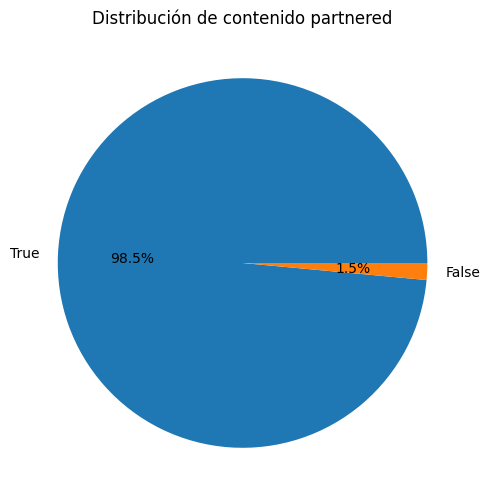

In [39]:
# Guardo en una variable la cantidad de canales según si tienen partner
partnered_counts = df_spanish['Partnered'].value_counts()
print(partnered_counts)

# Realizo un gráfico de torta
plt.figure(figsize=(6,6))
plt.pie(partnered_counts, labels=partnered_counts.index, autopct='%1.1f%%')
plt.title('Distribución de contenido partnered')
plt.show()

In [40]:
# Muestro en una tabla a los canales que NO tienen partner (en este caso es solo un canal)
df_spanish[df_spanish['Partnered'] == False]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
452,Ampeterby7,254852265,27480,43882,9301,1194476,1185647,6513197,False,False,Spanish


¿Existe alguna correlación entre las variables numéricas?

Para responder a esta pregunta, utilicé gráficos de dispersión para ver a simple vista si podía encontrar relación entre algunas variables.

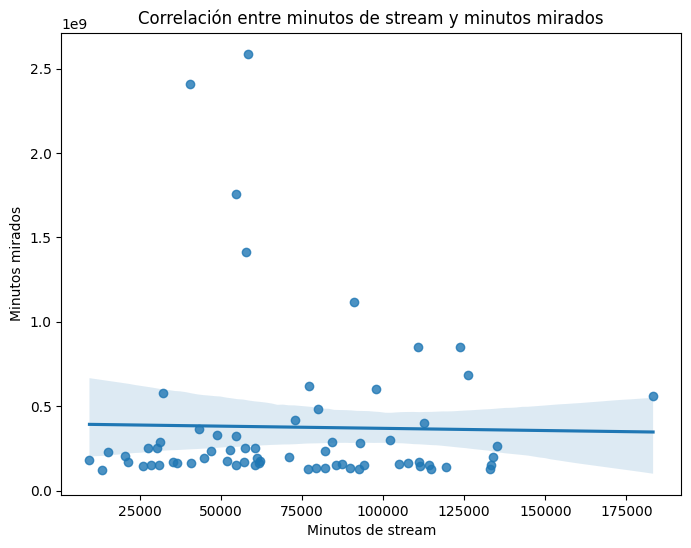

In [41]:
# Gráfico de dispersión entre minutos de stream y minutos mirados.

plt.figure(figsize=(8,6))
sns.regplot(x='Stream time(minutes)', y='Watch time(Minutes)', data=df_spanish)
plt.title('Correlación entre minutos de stream y minutos mirados')
plt.xlabel('Minutos de stream')
plt.ylabel('Minutos mirados')
plt.show()

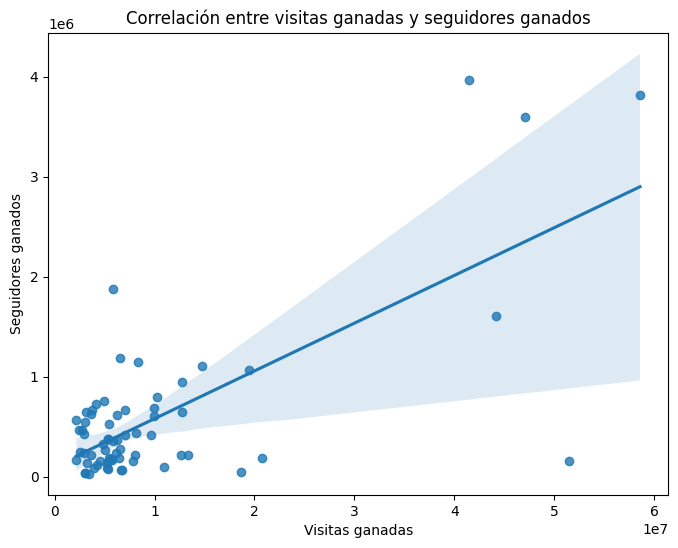

In [42]:
# Gráfico de dispersión entre visitas ganadas y seguidores ganados

plt.figure(figsize=(8,6))
sns.regplot(x='Views gained', y='Followers gained', data=df_spanish)
plt.title('Correlación entre visitas ganadas y seguidores ganados')
plt.xlabel('Visitas ganadas')
plt.ylabel('Seguidores ganados')
plt.show()

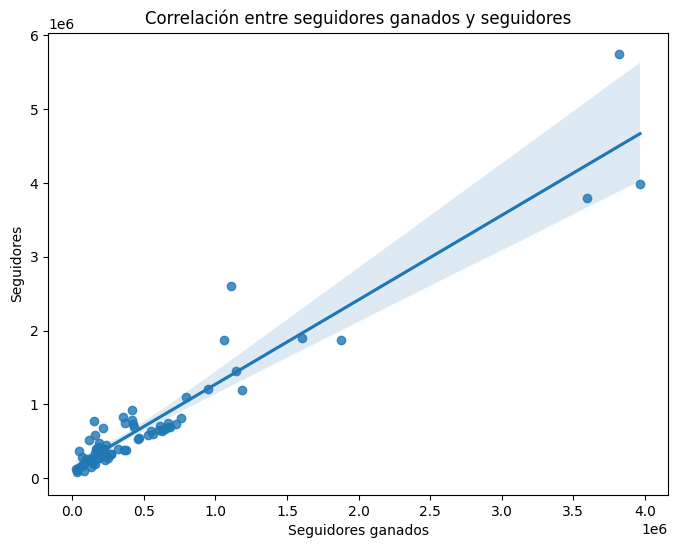

In [43]:
# Gráfico de dispersión entre seguidores ganados y seguidores del canal

plt.figure(figsize=(8,6))
sns.regplot(x='Followers gained', y='Followers', data=df_spanish)
plt.title('Correlación entre seguidores ganados y seguidores')
plt.xlabel('Seguidores ganados')
plt.ylabel('Seguidores')
plt.show()

¿Cuáles son los canales en español con el máximo pico de vistas?

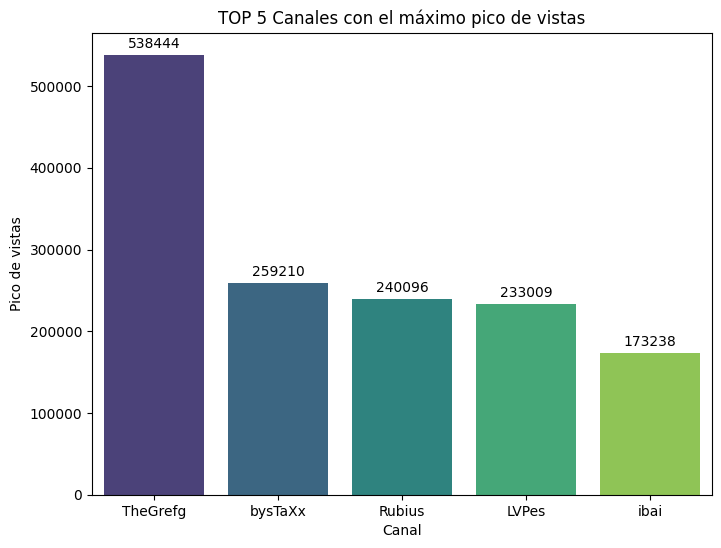

In [44]:
# Guardo en una variable los 5 canales con el máximo pico de vistas
top5 = df_spanish.nlargest(5, 'Peak viewers')

# Realizo un gráfico de barras
plt.figure(figsize=(8,6))
ax = sns.barplot(x='Channel', y='Peak viewers', data=top5, hue='Channel', palette='viridis', legend=False)
for i, value in enumerate(top5['Peak viewers']):
    ax.text(i, value + 5000, str(value), ha='center', va='bottom', fontsize=10, color='black')
plt.xlabel('Canal')
plt.ylabel('Pico de vistas')
plt.title('TOP 5 Canales con el máximo pico de vistas')
plt.show()

¿Cuáles son los canales en español con más seguidores?

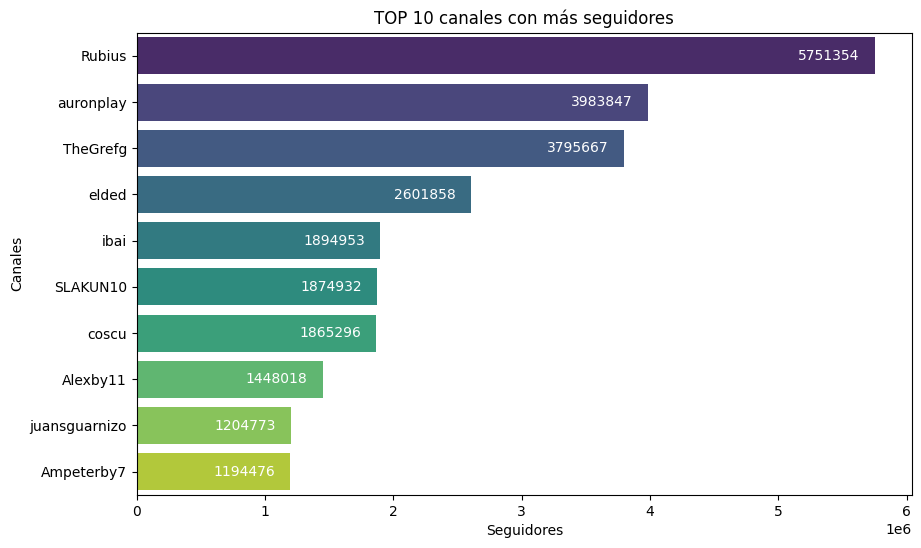

In [45]:
# Guardo en una variable los 10 canales con más seguidores
top10 = df_spanish.nlargest(10, 'Followers')

# Realizo un gráfico de barras
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Followers', y='Channel', data=top10, hue='Channel', palette='viridis', legend=False)
for i, value in enumerate(top10['Followers']):
    ax.text(value - 0.6e6, i, str(value), va='center', color='white')
plt.xlabel('Seguidores')
plt.ylabel('Canales')
plt.title('TOP 10 canales con más seguidores')
plt.show()

¿Cuáles son los canales con más tiempo de transmisión (Stream time)?

En este caso quise mostrar dos gráficos en vez de uno. El de la izquierda presenta a los 10 canales con más minutos de stream, y a la derecha a los mismos canales pero presentando los minutos mirados por los espectadores.

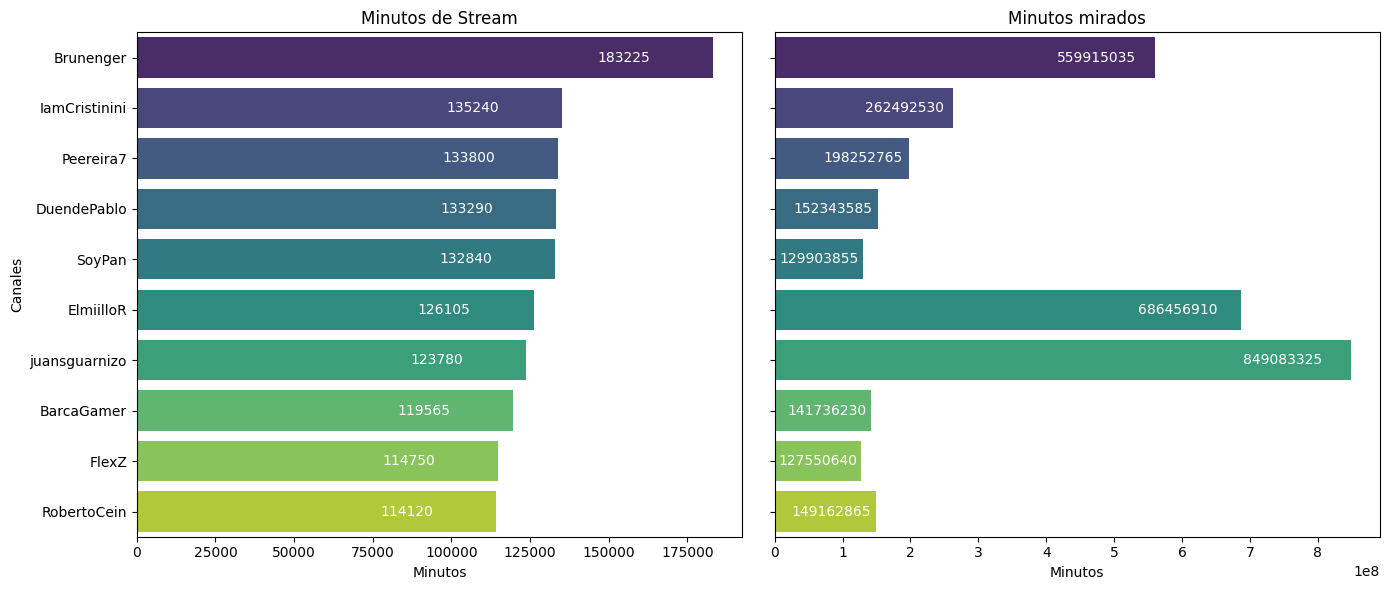

In [46]:
# Guardo en una variable a los 10 canales con más minutos de stream
top10 = df_spanish.nlargest(10, 'Stream time(minutes)')

# Creo la figura donde almacenar los dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
plt.subplots_adjust(wspace=0.4)

# Realizo un gráfico de barras para 'Stream time(minutes)', asignando hue a 'Channel'
ax1 = sns.barplot(x='Stream time(minutes)', y='Channel', data=top10, ax=axes[0], hue='Channel', palette='viridis', legend=False)
axes[0].set_title('Minutos de Stream')
axes[0].set_xlabel('Minutos')
axes[0].set_ylabel('Canales')

for i, value in enumerate(top10['Stream time(minutes)']):
    ax1.text(value - 20000, i, str(value), va='center', ha='right', color='white')

# Realizo un gráfico de barras para 'Watch time(Minutes)', asignando hue a 'Channel'
ax2 = sns.barplot(x='Watch time(Minutes)', y='Channel', data=top10, ax=axes[1], hue='Channel', palette='viridis', legend=False)
axes[1].set_title('Minutos mirados')
axes[1].set_xlabel('Minutos')
axes[1].set_ylabel('')

for i, value in enumerate(top10['Watch time(Minutes)']):
    ax2.text(value - 0.05 * value, i, str(value), va='center', ha='right', color='white')

# Muestro ambos gráficos
plt.tight_layout()
plt.show()

# CONCLUSIONES
- Podemos observar que la gran mayoría de canales que confomaron el top 1000 de streamers de Twitch hablan inglés. Los canales en español (idioma en el que enfoqué este análisis) está en cuarto lugar de los idiomas hablados.

- Solo una pequeña parte de los canales en español tienen un contenido maduro (16.2%), mientras que el resto de canales consideran que su contenido no es maduro (83.8%). De hecho, solamente 11 canales tienen un contenido maduro.

- En el caso de los canales que están asociados a Twitch, casi todos tienen el partner de la plataforma (98.5%), a excepción de un canal (1.5%). Este canal es el de Ampeterby7.

- Gracias a los gráficos de dispersión, podemos ver que NO hay una correlación fuerte entre el tiempo que los canales transmiten y el tiempo que los usuarios pasan mirando el contenido. <br>Donde SI hay una correlación lineal positiva y fuerte es entre visitas ganadas y seguidores ganados. Por lo que podemos decir que entre mayores vistas lleguen a un canal, más seguidores obtendrá. Lo mismo podemos observar entre los seguidores ganados y los seguidores totales que tiene el canal, lo cuál es algo obvio a primera vista pero no lo quiero pasar inadvertido.

- Por último, se identificaron los canales que tienen el mayor número de seguidores y aquellos que transmiten más minutos, lo que brinda una visión de los canales más influyentes en la plataforma dentro de la comunidad hispanohablante.

En definitiva, este análisis resalta a las características de los streamers en español y la importancia que tiene el tiempo de transmisión para la popularidad y el crecimiento de estos canales.